In [23]:
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
import pandas as pd
data=pd.read_csv(r"D:\DS Methodology\codes\online_retail_II.csv")
df=pd.DataFrame(data)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [25]:
df.shape

(1067371, 8)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [27]:
df=df.dropna(subset=["Customer ID"])
df["Customer ID"]=df["Customer ID"].astype("int64")

In [28]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      824364 non-null  object 
 1   StockCode    824364 non-null  object 
 2   Description  824364 non-null  object 
 3   Quantity     824364 non-null  int64  
 4   InvoiceDate  824364 non-null  object 
 5   Price        824364 non-null  float64
 6   Customer ID  824364 non-null  int64  
 7   Country      824364 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 56.6+ MB


,Quantity,Price,Customer ID
count,824364.000000,824364.000000,824364.000000
mean,12.414574,3.676800,15324.638504
std,188.976099,70.241388,1697.464450
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13975.000000
50%,5.000000,1.950000,15255.000000
75%,12.000000,3.750000,16797.000000
max,80995.000000,38970.000000,18287.000000


In [29]:
#since Quantity min is negative ,so we have to drop all negative and zero values
df=df[df["Quantity"]>0]
df.describe() 

,Quantity,Price,Customer ID
count,805620.000000,805620.000000,805620.000000
mean,13.307665,3.206279,15331.856250
std,144.306739,29.197901,1696.768395
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13982.000000
50%,5.000000,1.950000,15271.000000
75%,12.000000,3.750000,16805.000000
max,80995.000000,10953.500000,18287.000000


In [30]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 779495 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      779495 non-null  object 
 1   StockCode    779495 non-null  object 
 2   Description  779495 non-null  object 
 3   Quantity     779495 non-null  int64  
 4   InvoiceDate  779495 non-null  object 
 5   Price        779495 non-null  float64
 6   Customer ID  779495 non-null  int64  
 7   Country      779495 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 53.5+ MB


In [31]:
filtered_data = df[["Country","Customer ID"]].drop_duplicates()
print(filtered_data.head())
filtered_data.shape

           Country  Customer ID
0   United Kingdom        13085
12  United Kingdom        13078
31  United Kingdom        15362
54  United Kingdom        18102
71          France        12682


(5894, 2)

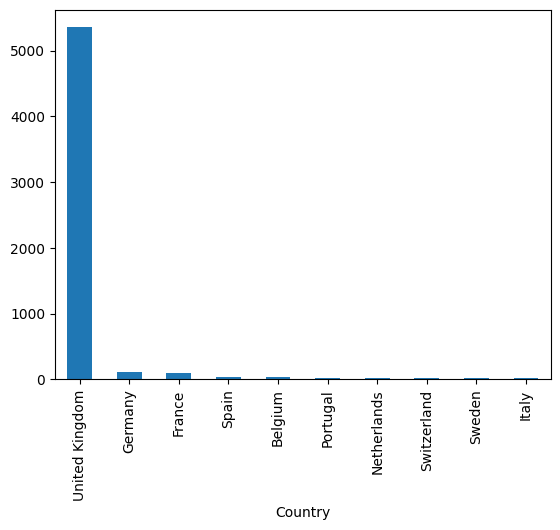

In [32]:
#visualize top 10 countries
filtered_data["Country"].value_counts()[:10].plot(kind="bar");

In [33]:
uk=df[df["Country"]=="United Kingdom"]
uk.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [34]:
print(uk.nunique())

Invoice        33546
StockCode       4616
Description     5249
Quantity         405
InvoiceDate    31562
Price            553
Customer ID     5353
Country            1
dtype: int64


In [35]:
#select relevant columns for analysis
uk=df[["Customer ID","Invoice","InvoiceDate","Quantity","Price"]]
uk["Total-price"]=uk["Price"]*uk["Quantity"]
uk['InvoiceDate'] = pd.to_datetime(uk['InvoiceDate'])
uk.head()

C:\Users\nourh\AppData\Local\Temp\ipykernel_10444\1380033438.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk["Total-price"]=uk["Price"]*uk["Quantity"]
C:\Users\nourh\AppData\Local\Temp\ipykernel_10444\1380033438.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk['InvoiceDate'] = pd.to_datetime(uk['InvoiceDate'])


,Customer ID,Invoice,InvoiceDate,Quantity,Price,Total-price
0,13085,489434,2009-12-01 07:45:00,12,6.95,83.4
1,13085,489434,2009-12-01 07:45:00,12,6.75,81.0
2,13085,489434,2009-12-01 07:45:00,12,6.75,81.0
3,13085,489434,2009-12-01 07:45:00,48,2.10,100.8
4,13085,489434,2009-12-01 07:45:00,24,1.25,30.0


In [36]:
present_date=datetime.now()
present_date

datetime.datetime(2024, 11, 16, 22, 58, 59, 311247)

In [37]:
rfm=uk.groupby("Customer ID").agg({"InvoiceDate":lambda date : (present_date - date.max()).days,"Invoice":lambda num : len(num),"Total-price" :lambda price: price.sum()}).rename(columns={
    "InvoiceDate": "Recency",
    "Invoice": "Frequency",
    "Total-price": "Monetary"
})
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,5051,34,77556.46
12347,4728,222,4921.53
12348,4801,51,2019.40
12349,4744,175,4428.69
12350,5036,17,334.40


In [38]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5881 entries, 12346 to 18287
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    5881 non-null   int64  
 1   Frequency  5881 non-null   int64  
 2   Monetary   5881 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 183.8 KB


In [39]:
rfm["r_quartile"]=pd.qcut(rfm["Recency"],4,['1','2','3','4'])
rfm["f_quartile"]=pd.qcut(rfm["Frequency"],4,['4','3','2','1'])
rfm["m_quartile"]=pd.qcut(rfm["Monetary"],4,['4','3','2','1'])
rfm.head()


,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile
Customer ID,,,,,,
12346,5051,34,77556.46,3,3,1
12347,4728,222,4921.53,1,1,1
12348,4801,51,2019.40,2,3,2
12349,4744,175,4428.69,1,1,1
12350,5036,17,334.40,3,4,4


In [40]:
rfm["RFM Score"]=rfm["r_quartile"].astype("str")+rfm["f_quartile"].astype("str")+rfm["m_quartile"].astype("str")
rfm.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM Score
Customer ID,,,,,,,
12346,5051,34,77556.46,3,3,1,331
12347,4728,222,4921.53,1,1,1,111
12348,4801,51,2019.40,2,3,2,232
12349,4744,175,4428.69,1,1,1,111
12350,5036,17,334.40,3,4,4,344


In [41]:
rfm[rfm["RFM Score"]=="111"].sort_values("Monetary",ascending=False).head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM Score
Customer ID,,,,,,,
18102,4726,1040,580987.04,1,1,1,111
14646,4727,3854,528602.52,1,1,1,111
14156,4735,4038,313437.62,1,1,1,111
14911,4727,11079,291420.81,1,1,1,111
17450,4734,421,244784.25,1,1,1,111


In [42]:
rfm["RFM Score"]=rfm["RFM Score"].astype("int64")
rfm["Value_Segment"]=pd.qcut(rfm["RFM Score"],3,["HIGH","MID","LOW"])
rfm.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM Score,Value_Segment
Customer ID,,,,,,,,
12346,5051,34,77556.46,3,3,1,331,MID
12347,4728,222,4921.53,1,1,1,111,HIGH
12348,4801,51,2019.40,2,3,2,232,MID
12349,4744,175,4428.69,1,1,1,111,HIGH
12350,5036,17,334.40,3,4,4,344,LOW


In [ ]:
# additinal lambda functions
# Apply a lambda function to create a new column that combines Customer ID and Country
df["CustomerCountry"] = df.apply(lambda row: f'{row["Customer ID"]}_{row["Country"]}', axis=1)
df

# Apply a lambda function to adjust the Price by a certain percentage (e.g., 10%)
df["Adjusted_Price"] = df["Price"].apply(lambda x: x * 1.10)
df
# # Apply a lambda function for a conditional operation, for example: If Quantity > 10, label as "High", else "Low"
df["Quantity_Category"] = df["Quantity"].apply(lambda x: "High" if x > 10 else "Low")
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Adjusted_Price,Quantity_Category
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,7.645,High
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,7.425,High
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,7.425,High
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2.310,High
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,1.375,High
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2.310,Low
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,4.565,Low
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,4.565,Low
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,5.445,Low


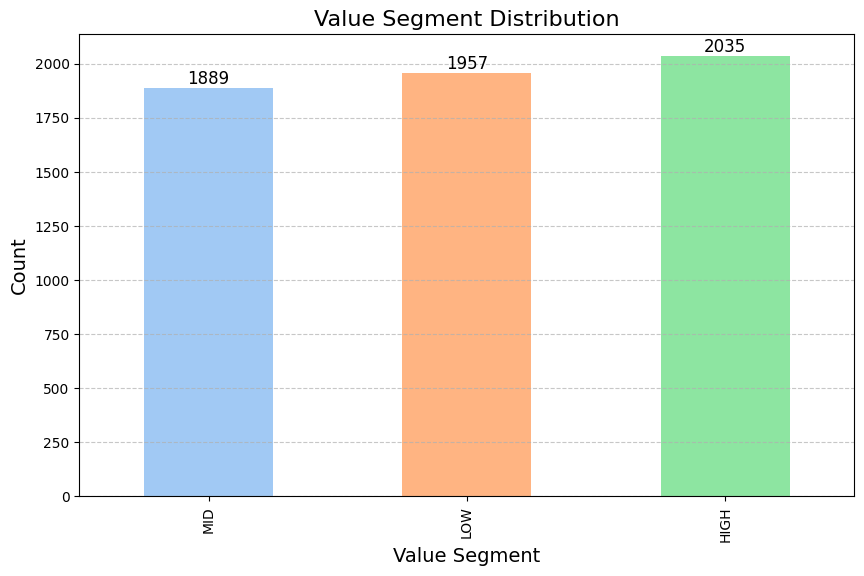

In [44]:
# Create the plot
plt.figure(figsize=(10, 6)) # Set the figure size
ax = rfm["Value_Segment"].value_counts().sort_values().plot(kind='bar', color=sns.color_palette("pastel"))
 # Customize the plot
ax.set_title('Value Segment Distribution', fontsize=16) # Add a title with␣
 #font size
ax.set_xlabel('Value Segment', fontsize=14)
#  ↪font size
ax.set_ylabel('Count', fontsize=14)
#  ↪font size
ax.grid(axis='y', linestyle='--', alpha=0.7)

for p in ax.patches:
 ax.annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='bottom', fontsize=12)
 # Show the plot
plt.show()